In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.metrics import mean_absolute_error

In [2]:
data = pd.read_csv('/Users/elliott.burton/Machine Learning/Shared/practice-datasets/car_insurance_cold_calls.csv')

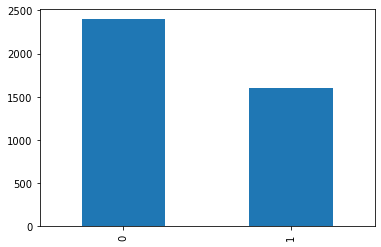

In [3]:
data['CarInsurance'].value_counts()[:100].plot(kind='bar')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
Id                  4000 non-null int64
Age                 4000 non-null int64
Job                 3981 non-null object
Marital             4000 non-null object
Education           3831 non-null object
Default             4000 non-null int64
Balance             4000 non-null int64
HHInsurance         4000 non-null int64
CarLoan             4000 non-null int64
Communication       3098 non-null object
LastContactDay      4000 non-null int64
LastContactMonth    4000 non-null object
NoOfContacts        4000 non-null int64
DaysPassed          4000 non-null int64
PrevAttempts        4000 non-null int64
Outcome             958 non-null object
CallStart           4000 non-null object
CallEnd             4000 non-null object
CarInsurance        4000 non-null int64
dtypes: int64(11), object(8)
memory usage: 593.9+ KB


In [5]:
JobCheck = data.loc[data['Job'].isnull()]
JobCheck = JobCheck.sort_values('Age',ascending =True)
JobCheck

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
3738,3739,26,NaN,divorced,secondary,0,-295,1,0,cellular,7,may,1,-1,0,NaN,09:59:39,10:08:55,0
1438,1439,27,NaN,single,secondary,0,1187,0,0,telephone,26,feb,1,101,1,failure,09:13:46,09:17:38,1
2842,2843,28,NaN,single,NaN,0,326,0,0,cellular,11,oct,1,231,1,success,10:11:10,10:18:40,1
1755,1756,28,NaN,single,secondary,0,4465,0,0,cellular,28,jan,1,-1,0,NaN,14:03:50,14:16:39,1
536,537,33,NaN,single,secondary,0,1522,0,1,cellular,19,nov,1,-1,0,NaN,12:44:40,13:00:46,0
3615,3616,39,NaN,single,NaN,0,0,0,0,telephone,28,jan,1,-1,0,NaN,10:20:54,10:21:22,0
239,240,41,NaN,single,NaN,0,942,0,0,cellular,27,oct,1,188,1,success,16:39:43,16:42:06,1
3490,3491,43,NaN,married,primary,0,2113,0,0,cellular,29,jul,2,-1,0,NaN,12:39:57,12:40:30,0
2032,2033,44,NaN,married,NaN,0,722,1,0,telephone,22,jul,2,-1,0,NaN,14:34:58,14:39:27,0
27,28,45,NaN,divorced,NaN,0,0,0,0,cellular,21,apr,3,-1,0,NaN,12:33:22,12:38:00,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
Id                  4000 non-null int64
Age                 4000 non-null int64
Job                 3981 non-null object
Marital             4000 non-null object
Education           3831 non-null object
Default             4000 non-null int64
Balance             4000 non-null int64
HHInsurance         4000 non-null int64
CarLoan             4000 non-null int64
Communication       3098 non-null object
LastContactDay      4000 non-null int64
LastContactMonth    4000 non-null object
NoOfContacts        4000 non-null int64
DaysPassed          4000 non-null int64
PrevAttempts        4000 non-null int64
Outcome             958 non-null object
CallStart           4000 non-null object
CallEnd             4000 non-null object
CarInsurance        4000 non-null int64
dtypes: int64(11), object(8)
memory usage: 593.9+ KB


In [7]:
data['Communication'] = data['Communication'].fillna('unknown')
data['Outcome'] = data['Outcome'].fillna('no_prior_contact')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
Id                  4000 non-null int64
Age                 4000 non-null int64
Job                 3981 non-null object
Marital             4000 non-null object
Education           3831 non-null object
Default             4000 non-null int64
Balance             4000 non-null int64
HHInsurance         4000 non-null int64
CarLoan             4000 non-null int64
Communication       4000 non-null object
LastContactDay      4000 non-null int64
LastContactMonth    4000 non-null object
NoOfContacts        4000 non-null int64
DaysPassed          4000 non-null int64
PrevAttempts        4000 non-null int64
Outcome             4000 non-null object
CallStart           4000 non-null object
CallEnd             4000 non-null object
CarInsurance        4000 non-null int64
dtypes: int64(11), object(8)
memory usage: 593.9+ KB


In [9]:
data = data.dropna(subset = ['Job','Education'])

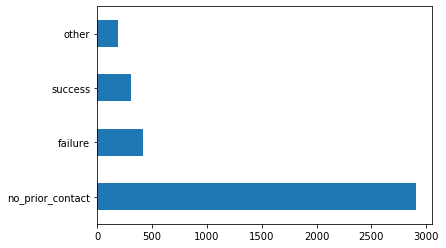

In [10]:
data['Outcome'].value_counts()[:100].plot(kind='barh')

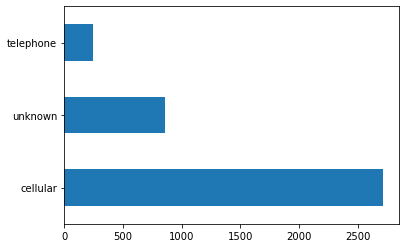

In [11]:
data['Communication'].value_counts()[:100].plot(kind='barh')

In [12]:
pd.crosstab(data.PrevAttempts, data.Outcome)

Outcome,failure,no_prior_contact,other,success
PrevAttempts,,,,
0,0,2907,0,0
1,148,0,68,103
2,120,0,39,78
3,58,0,24,41
4,39,0,10,28
5,28,0,13,16
6,6,0,9,9
7,5,0,6,7
8,4,0,5,8


In [13]:
LastYearInfo = pd.crosstab(data.PrevAttempts, data.Outcome)

In [14]:
LastYearInfo = LastYearInfo.drop(LastYearInfo.index[0])


In [20]:
LastYearInfo['successRatio'] = LastYearInfo.apply(lambda row: row.success/(row.success + row.failure+ 0.001), axis=1)

In [17]:
LastYearInfo.head()

Outcome,failure,no_prior_contact,other,success,successRatio
PrevAttempts,,,,,
1,148,0,68,103,0.410357
2,120,0,39,78,0.393937
3,58,0,24,41,0.414137
4,39,0,10,28,0.417904
5,28,0,13,16,0.363628


In [22]:
LastYearInfo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 1 to 58
Data columns (total 5 columns):
failure             19 non-null int64
no_prior_contact    19 non-null int64
other               19 non-null int64
success             19 non-null int64
successRatio        19 non-null float64
dtypes: float64(1), int64(4)
memory usage: 912.0 bytes


In [50]:
y = LastYearInfo.axes[0].tolist()
y

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 18, 19, 23, 30, 58]

In [62]:
x=LastYearInfo['successRatio'].tolist()
x

[0.4103569308488811,
 0.3939374043565436,
 0.41413723093706123,
 0.4179042103849196,
 0.3636280993613782,
 0.599960002666489,
 0.5832847262728106,
 0.666611115740355,
 0.2499375156210947,
 0.7776913676258194,
 0.33322225924691773,
 0.7498125468632841,
 0.6664445184938355,
 0.7498125468632841,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

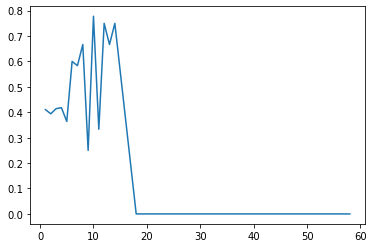

In [65]:
sns.lineplot(x=y, y=x, data=LastYearInfo)